# Classification

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Logistic regression

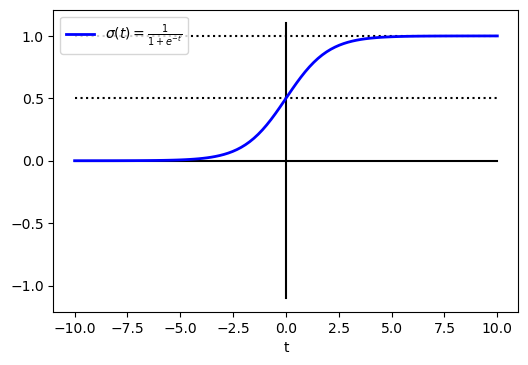

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot([-10, 10], [0, 0], "k-")
ax.plot([-10, 10], [0.5, 0.5], "k:")
ax.plot([-10, 10], [1, 1], "k:")
ax.plot([0, 0], [-1.1, 1.1], "k-")
ax.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

ax.set(xlabel="t")
ax.legend(loc="upper left")
plt.show()

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

/usr/local/Caskroom/miniconda/base/envs/kaggle/lib/python3.9/site-packages/matplotlib/patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


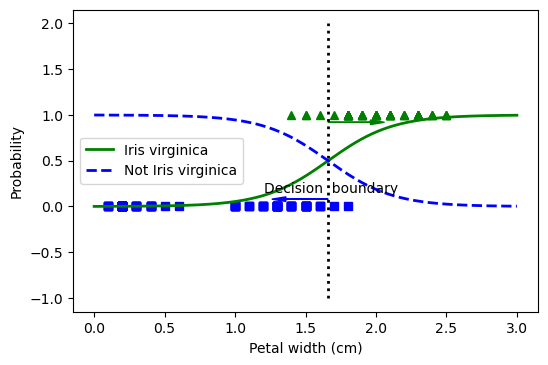

In [9]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X[y == 0], y[y == 0], "bs")
ax.plot(X[y == 1], y[y == 1], "g^")
ax.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
ax.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
ax.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

ax.set(xlabel="Petal width (cm)", ylabel="Probability")
ax.legend(loc="center left", fontsize='medium')
plt.show()

In [10]:
decision_boundary

array([1.66066066])

In [11]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [12]:
log_reg.coef_

array([[4.3330846]])

In [13]:
log_reg.intercept_[0]

-7.194708301503783

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
petal_length = iris["data"][:, 2]
petal_width = iris["data"][:, 3]

X = np.c_[petal_length, petal_width]
y = (iris["target"] == 2).astype(int)

In [ ]:
def make_mesh(xlims, ylims, h):
    x = np.arange(xlims[0], xlims[1], h)
    y = np.arange(ylims[0], ylims[1], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

In [ ]:
def make_zz(x0, x1):
    X_new = np.c_[x0.flatten(), x1.flatten()]
    y_proba = log_reg.predict_proba(X_new)
    zz = y_proba[:, 1].reshape(x0.shape)
    return zz

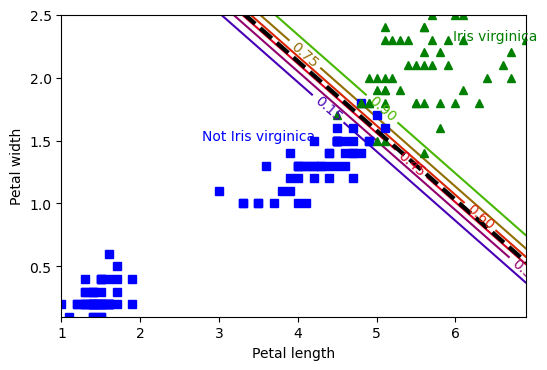

In [16]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X[y == 0, 0], X[y == 0, 1], "bs")
ax.plot(X[y == 1, 0], X[y == 1, 1], "g^")
ax.text(3.5,
        1.5,
        "Not Iris virginica",
        fontsize='medium',
        color="b",
        ha="center")
ax.text(6.5, 2.3, "Iris virginica", fontsize='medium', color="g", ha="center")

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

xlims = [petal_length.min(), petal_length.max()]
ylims = [petal_width.min(), petal_width.max()]

ax.set(xlims=xlims, ylims=ylims, xlabel="Petal length", ylabel="Petal width")

x0, x1 = make_mesh(xlims, ylims, 200)

X_new = np.c_[x0.flatten(), x1.flatten()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

contour = ax.contour(x0, x1, zz, cmap=plt.cm.brg)
ax.clabel(contour, inline=True)

# coef_: array, shape (1, n_features)
# intercept_ : array, shape (1,)
left_right = np.array([petal_length.min(), petal_length.max()])
boundary = -(log_reg.coef_[0][0] * left_right +
             log_reg.intercept_[0]) / log_reg.coef_[0][1]
ax.plot(left_right, boundary, "k--", linewidth=3)
plt.show()

## Softmax Regression

In [17]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",
                                 C=10,
                                 random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [18]:
from matplotlib.colors import ListedColormap

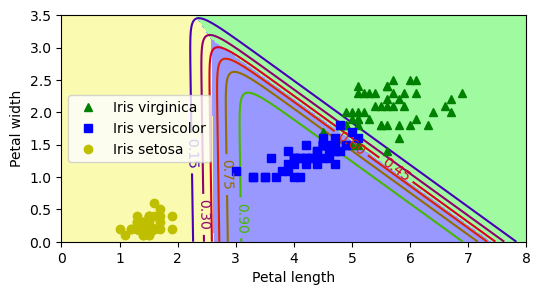

In [19]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

_, ax = plt.subplots(figsize=(6, 3), dpi=100)

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

for ind, (style, lb) in enumerate(zip(styles, labels)):
    ax.plot(X[y == ind, 0], X[y == ind, 1], style, label=lb)

ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="center left", fontsize='medium')

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.flatten(), x1.flatten()]

y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)
ax.contourf(x0, x1, zz, cmap=custom_cmap)

y_proba = softmax_reg.predict_proba(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
contour = ax.contour(x0, x1, zz1, cmap=plt.cm.brg)
ax.clabel(contour, inline=True)

plt.show()

In [20]:
softmax_reg.predict([[5, 2]])

array([2])

In [21]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Early stopping for Softmax Regression

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [22]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [25]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [26]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [27]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [28]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [29]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [30]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [31]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [32]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [33]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [34]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(
            np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T.dot(error)
    Theta -= eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981873
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.4482424418895776
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [35]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [36]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [37]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta -= eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.489899247009333
3000 0.48929905984511984
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [38]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [39]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]),
                                                     alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(
        np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1 / 2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [40]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

In [41]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.flatten(), x1.flatten()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
zz1 = Y_proba[:, 1].reshape(x0.shape)

y_predict = np.argmax(Y_proba, axis=1)
zz = y_predict.reshape(x0.shape)

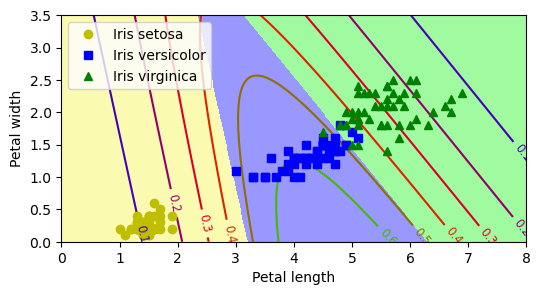

In [42]:
_, ax = plt.subplots(figsize=(6, 3), dpi=100)

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

for ind, (style, lb) in enumerate(zip(styles, labels)):
    ax.plot(X[y == ind, 0], X[y == ind, 1], style, label=lb)

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

ax.contourf(x0, x1, zz, cmap=custom_cmap)
contour = ax.contour(x0, x1, zz1, cmap=plt.cm.brg)
ax.clabel(contour, inline=1, fontsize='small')
ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="upper left", fontsize='medium')

plt.show()

In [43]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

## MNIST

In [106]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home='../data')

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [45]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [46]:
y.shape

(70000,)

In [47]:
np.sqrt(X.shape[1])

28.0

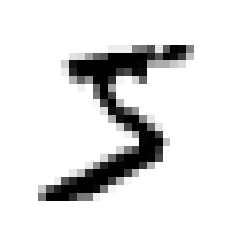

In [48]:
some_digit = X.iloc[0].to_numpy()

plt.imshow(some_digit.reshape(28, 28), cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [49]:
y[0]

'5'

In [50]:
y = y.astype(np.uint8)

In [51]:
X[:100].values.shape

(100, 784)

In [52]:
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    ax.axis("off")

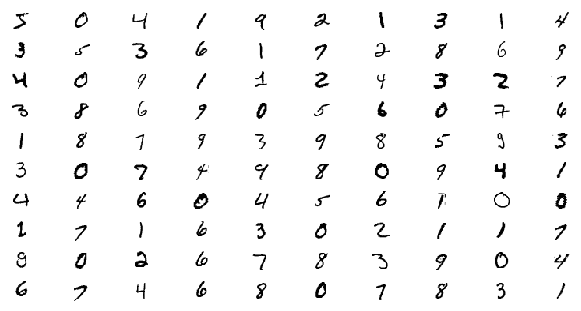

In [53]:
_, axes = plt.subplots(10, 10, figsize=(6, 3), dpi=100, constrained_layout=True)

example_images = X[:100]

for ind, ax in enumerate(axes.flatten()):
    img_data = example_images.iloc[ind].to_numpy()
    plot_digit(img_data, ax)

plt.show()

In [54]:
y[0]

5

In [55]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classifier

In [56]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [59]:
sgd_clf.predict([some_digit])

array([ True])

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [61]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [62]:
from sklearn.base import BaseEstimator

In [ ]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [63]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [64]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [66]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

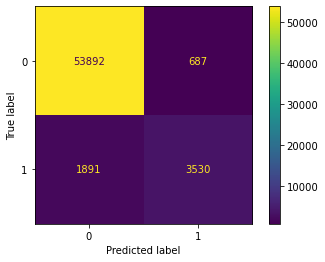

In [67]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [68]:
y_train_perfect_predictions = y_train_5
cm2 = confusion_matrix(y_train_5, y_train_perfect_predictions)
cm2

array([[54579,     0],
       [    0,  5421]])

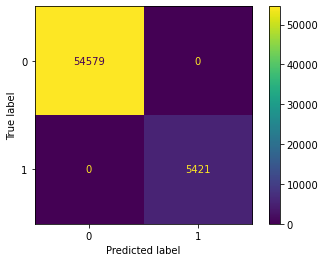

In [69]:
cm_display = ConfusionMatrixDisplay(cm2).plot()

In [71]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [72]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [74]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [75]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [76]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [77]:
y_some_digit_pred

array([ True])

In [78]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [79]:
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_5,
                             cv=3,
                             method="decision_function")

In [81]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [82]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, ax):
    ax.plot(thresholds,
             precisions[:-1],
             "b--",
             label="Precision",
             linewidth=2)
    ax.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    ax.legend(loc="center right")
    ax.set(xlabel="Threshold")
    ax.grid(True)

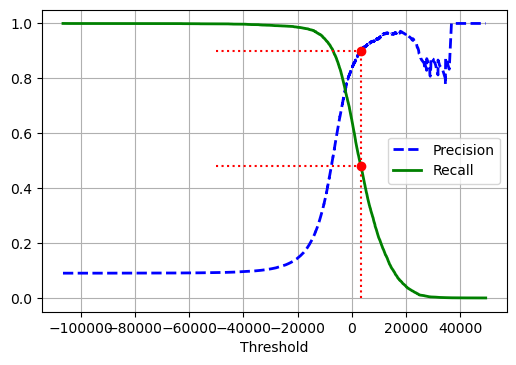

In [83]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds, ax)

ax.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
ax.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
ax.plot([-50000, threshold_90_precision],
        [recall_90_precision, recall_90_precision], "r:")
ax.plot([threshold_90_precision], [0.9], "ro")
ax.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

In [84]:
(y_train_pred == (y_scores > 0)).all()

True

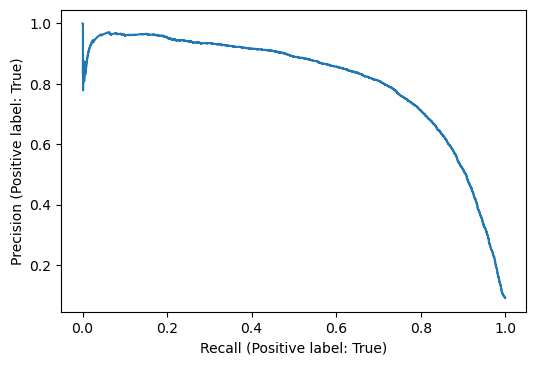

In [86]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

pr_display = PrecisionRecallDisplay(precision=precisions,
                                    recall=recalls,
                                    pos_label=sgd_clf.classes_[1]).plot(ax=ax)

plt.show()

In [87]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [88]:
threshold_90_precision

3370.0194991439557

In [89]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [90]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [91]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC curves

In [92]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc, roc_auc_score

In [93]:
fpr, tpr, thresholds = roc_curve(y_train_5,
                                 y_scores,
                                 pos_label=sgd_clf.classes_[1])

In [95]:
roc_auc = auc(fpr, tpr)

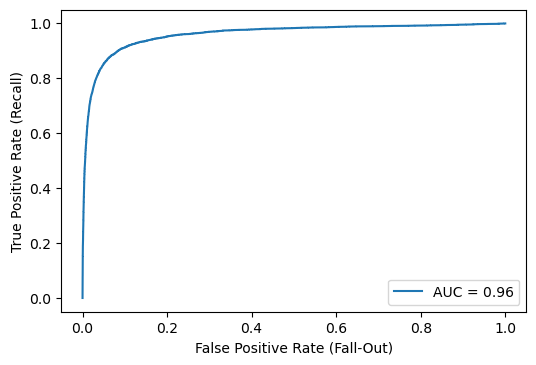

In [96]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax)

ax.set(xlabel='False Positive Rate (Fall-Out)',
       ylabel='True Positive Rate (Recall)')
plt.show()

In [98]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    method="predict_proba")

In [101]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

/usr/local/Caskroom/miniconda/base/envs/kaggle/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.83220653e-05 5.49661958e-05 5.49661958e-05 5.49661958e-05
 5.49661958e-05 5.49661958e-05 9.16103263e-05 9.16103263e-05
 1.09932392e-04 1.09932392e-04 1.09932392e-04 1.09932392e-04
 1.28254457e-04 1.28254457e-04 1.64898587e-04 2.19864783e-04
 2.19864783e-04 2.56508914e-04 2.56508914e-04 2.74830979e-04
 2.93153044e-04 2.93153044e-04 3.48119240e-04 3.84763371e-04
 4.21407501e-04 4.39729566e-04 4.58051632e-04 5.13017827e-04
 5.49661958e-04 6.22950219e-04 6.96238480e-04 6.96238480e-04
 7.51204676e-04 8.24492937e-04 8.97781198e-04 1.08100185e-03
 1.13596805e-03 1.28254457e-03 1.42912109e-03 1.52073142e-03
 1.74059620e-03

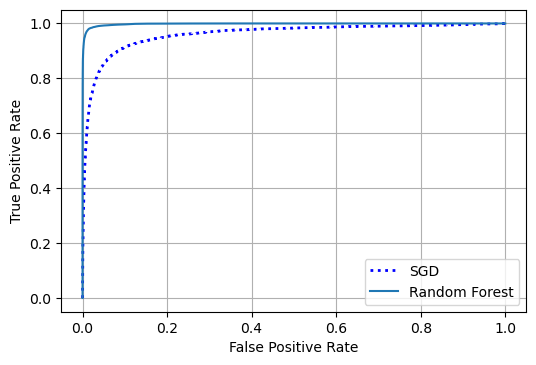

In [102]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
roc_display = RocCurveDisplay(fpr_forest,
                              tpr_forest,
                              estimator_name="Random Forest").plot(ax=ax)
ax.grid(True)
ax.legend(loc="lower right")
plt.show()

In [103]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [104]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [105]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591